In [3]:
!ls /mnt/e/ML/supervisely-persons-DatasetNinja/

LICENSE.md  ds1   ds11	ds13  ds3  ds5	ds7  ds9
README.md   ds10  ds12	ds2   ds4  ds6	ds8  meta.json


In [5]:
import numpy as np
import cv2, zlib, base64, io
from PIL import Image
import json
import matplotlib.pyplot as plt

def base64_2_mask(s):
    z = zlib.decompress(base64.b64decode(s))
    n = np.fromstring(z, np.uint8)
    mask = cv2.imdecode(n, cv2.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
    return mask

In [6]:
with open('/mnt/e/ML/supervisely-persons-DatasetNinja/ds1/ann/girl-people-landscape-sun-38554.png.json') as json_file:
    labels = json.load(json_file)
labels

{'description': '',
 'tags': [],
 'size': {'height': 800, 'width': 533},
 'objects': [{'id': 52538835,
   'classId': 6462822,
   'description': '',
   'geometryType': 'bitmap',
   'labelerLogin': 'inbox@datasetninja.com',
   'createdAt': '2020-09-11T07:46:25.810Z',
   'updatedAt': '2020-09-11T07:46:25.810Z',
   'tags': [],
   'classTitle': 'person_bmp',
   'bitmap': {'data': 'eJxNVFtQE2cU/v/dJGQCIYkEiGkK2wyWRSiJUm24FBYNIi1CgGgqOM4KKqVeuFQgTFE3oAiI4m2ACMIygLc6gIgVq5DVInQES6p2pFNRuQxV0BotWJRgGn3o9OW7PZz5znk4JZqYSD5PygMA8KNWquMBgHMAoBhE7YnL5z4uduJoorURdrbZbE2/1w3ZFdwRH5MAiPHBzQCw/aPU4Vp9zbOh8KyGICGHXOd3dYwbdF0WHukSeSdOVVBRu/Dm1bFN4FSZ+vvddFPj2jzRziX1v5mI7ug73eWzUzllJZ67w/qDlasCqT+QN07kFuun5t5L1QSNfvCnZVRvNtz6tiph3zsoevZiavHWup/SXmrJWdnmu5l2OHZtBcian8wc5XVwCf/lYosaW1qbWJQk5rrD8yUra7nnS/SAqIn6kFeFEzWlSnIALa4f12ChtYMHcWE6OzmsN2kYkDR4sQZDhowEDTjsrQi2gOfUwSK+EEtWlnmzl511bYbxAcZjuH2Kl/k56sZeN89yZfRoBA3OhBzHDYea5bDVG93gnoG1JuyZUx92+PGCYSi6EOYuba1Ow1t1EbJBxwjJYFShnArl73AFofwOHjV8Cp3tbL/QpoWN7pw8M

(800, 509)


/tmp/ipykernel_1203/3637101754.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  n = np.fromstring(z, np.uint8)


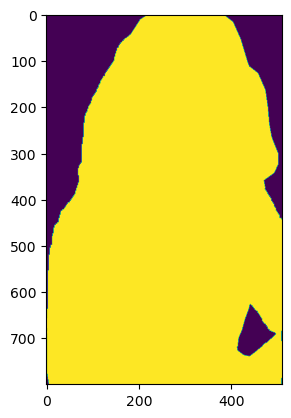

In [13]:
mask_str = labels['objects'][0]['bitmap']['data']
mask = base64_2_mask(mask_str)
print(mask.shape)
plt.imshow(mask)

True

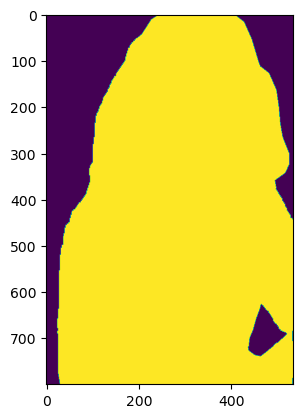

In [14]:
binary_mask = np.zeros(( labels['size']['height'], labels['size']['width']))
start_point = labels['objects'][0]['bitmap']['origin']

binary_mask[start_point[1] : mask.shape[0]+start_point[1], start_point[0] : mask.shape[1]+start_point[0]] = mask
plt.imshow(binary_mask)

cv2.imwrite("binary_mask.png", (binary_mask*255).astype(np.uint8))

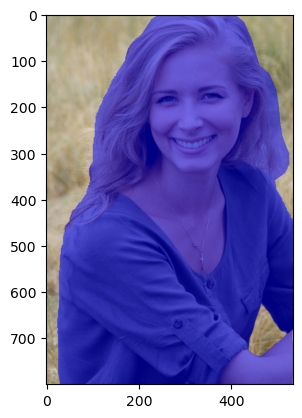

In [18]:
def overlay(image, mask, color, alpha=0.5, resize=None):
    """Combines image and its segmentation mask into a single image.
    https://www.kaggle.com/code/purplejester/showing-samples-with-segmentation-mask-overlay

    Params:
        image: Training image. np.ndarray,
        mask: Segmentation mask. np.ndarray,
        color: Color for segmentation mask rendering.  tuple[int, int, int] = (255, 0, 0)
        alpha: Segmentation mask's transparency. float = 0.5,
        resize: If provided, both image and its mask are resized before blending them together.
        tuple[int, int] = (1024, 1024))

    Returns:
        image_combined: The combined image. np.ndarray

    """
    color = color[::-1]
    colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
    colored_mask = np.moveaxis(colored_mask, 0, -1)
    masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
    image_overlay = masked.filled()

    if resize is not None:
        image = cv2.resize(image.transpose(1, 2, 0), resize)
        image_overlay = cv2.resize(image_overlay.transpose(1, 2, 0), resize)

    image_combined = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)

    return image_combined


color_img = cv2.imread("/mnt/e/ML/supervisely-persons-DatasetNinja/ds1/img/girl-people-landscape-sun-38554.png", cv2.IMREAD_COLOR)
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
overlay_img = overlay(color_img, binary_mask*255, [255, 0, 0])
plt.imshow(overlay_img)